# Jupyter Notebook for Problem Set 02
Troubleshooting: **Kernel -> Restart and Clear Output** resets the notebook state.

## Plotting a Bifurcation Diagram

If you can solve for the equilibrium branch $x$ explicitly as a function of the bifurcation parameter $r$, then you can plot the bifurcation diagram in the usual way, with $r$ on the horizontal axis and $x(r)$ on the vertical axis, using the plotting tools we learned previously (either `sympy` or `matplotlib`).

In many cases, solving explicitly for $x(r)$ is difficult or unnecessary. Instead, it is often easier to describe the equilibria parametrically by solving for $r$ as a function of $x$.

For example, consider
$$
\dot x = -r(1+x^4)+x^3+1.
$$
Setting $\dot x=0$ and solving for $r$ gives
$$
r(x)=\frac{1+x^3}{1+x^4}.
$$
Rather than finding $x(r)$, we can plot the equilibrium curve parametrically by plotting the pair $(r(x),\,x)$. This produces the bifurcation diagram with $r$ on the horizontal axis and $x$ on the vertical axis.

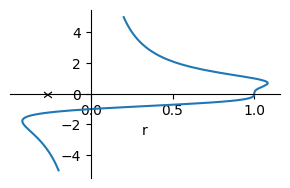

In [4]:
# Parametric plot of the equilibrium curve (r(x), x)
# This produces a curve of fixed points with r on the horizontal axis
# and x on the vertical axis, without explicitly solving for x(r).
import sympy as sym
from sympy.plotting import plot_parametric

x = sym.Symbol('x')

plot_parametric(
    ((1 + x**3) / (1 + x**4), x),
    (x, -5, 5),
    xlabel='r',
    ylabel='x',
    size=(3, 2)
)

In SymPy’s plotting tools, it’s easy to change the curve color, but you cannot easily change the *line style* (e.g., solid vs. dashed). That means you can’t use dashed lines to indicate unstable branches of equilibria. Instead, you can either:

- indicate stability using different colors, or  
- add stability markings by hand after exporting the figure.

If you choose color-coding, you’ll need to (1) locate the bifurcation point(s) (see below), then (2) plot the equilibrium curve over separate $x$-intervals so you can assign different colors to stable vs. unstable branches. 

Note: SymPy’s built-in legend support is limited.  It can label plotted expressions, but it does not easily produce labels like “stable” and “unstable.” If you want a clean legend, it is usually easiest to add it outside Python (e.g., in a PDF editor or in your write-up). In the example below, blue indicates stable and orange indicates unstable.

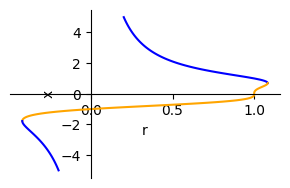

In [7]:
# Split the parametric curve into intervals separated by bifurcation points
# so that different colors can be used to indicate stability.
# Here, blue = stable and orange = unstable.

f = ((1 + x**3) / (1 + x**4), x)

# Stable branch (left)
p0 = plot_parametric(
    f, (x, -5, -1.7844),
    line_color='blue',
    show=False
)

# Unstable branch (middle)
p1 = plot_parametric(
    f, (x, -1.7844, 0.6925),
    line_color='orange',
    show=False
)

# Stable branch (right)
p2 = plot_parametric(
    f, (x, 0.6925, 5),
    line_color='blue',
    size=(3, 2),
    show=False,
    xlabel='r',
    ylabel='x'
)

# Combine all branches into a single figure
p2.append(p1[0])
p2.append(p0[0])
p2.show()


You can also use `plot_parametric` when you have an explicit expression for $x(r)$. In this case, place $r$ in the first component and $x(r)$ in the second component of the parametric plot.

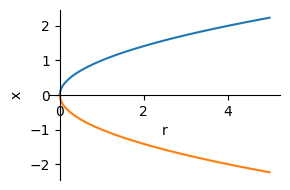

In [ ]:
# Plot the fixed point curves explicitly

# Parameter
r = sym.Symbol('r')

plot_parametric(
    (r,  sym.sqrt(r)), # stable branch
    (r, -sym.sqrt(r)), # unstable branch
    (r, 0, 5),
    xlabel='r',
    ylabel='x',
    size=(3,2)
)

You can also use the `plot_implicit` function, which allows you to plot curves defined implicitly with a SymPy equation. This can be convenient when neither $x(r)$ nor $r(x)$ is easy to write explicitly. However, the resulting curves can sometimes look distorted (see the second example below).

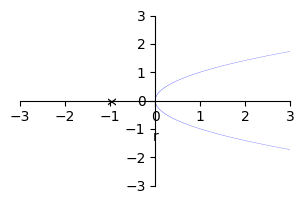

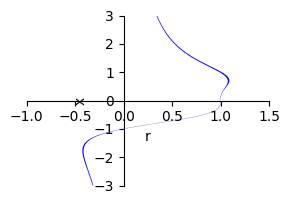

In [11]:
# Implicit plotting of equilibrium curves using plot_implicit.
# This plots the set of (r, x) values that satisfy the equilibrium equation.

from sympy import plot_implicit

# Simple example: r = x^2
plot_implicit(
    sym.Eq(r - x**2, 0),
    (r, -3, 3),
    (x, -3, 3),
    xlabel='r',
    ylabel='x',
    size=(3,2)
)

# More complicated example
plot_implicit(
    sym.Eq(-r*(1 + x**4) + x**3 + 1, 0),
    (r, -1, 1.5),
    (x, -3, 3),
    xlabel='r',
    ylabel='x',
    size=(3,2)
)


### Finding Branches and Bifurcation Points

A necessary condition for a bifurcation is that the system has a fixed point that is **non-hyperbolic**. In practical terms, this means we are looking for values of $x$ and $r$ that satisfy both conditions simultaneously:
- $f(x,r)=0$ (the equilibrium condition), and
- $\partial f/\partial x = 0$ (the fixed point is non-hyperbolic).

Solving these equations together identifies candidate bifurcation points and helps us locate where equilibrium branches are created, destroyed, or change stability.


In [13]:
# Solve for equilibrium branches and possible bifurcation points symbolically
x = sym.Symbol('x')
r = sym.Symbol('r')

equil_equation = sym.Eq(0, r + x**2)

# Non-hyperbolicity condition
deriv_equation = sym.Eq(0, sym.diff(r + x**2, x))

branches = sym.solve(equil_equation, x)
possible_bifurcation = sym.solve((equil_equation, deriv_equation), (x, r))
bifurcation_param = [sol[1] for sol in possible_bifurcation]

print("Equilibrium branches x(r):", branches)
print("Possible bifurcation point(s):", bifurcation_param)


Equilibrium branches x(r): [-sqrt(-r), sqrt(-r)]
Possible bifurcation point(s): [0]


## Plotting Stability Diagrams: Example 1
Bifurcations occur at **non-hyperbolic fixed points**, i.e. parameter values where the equilibrium condition and the zero-eigenvalue condition hold simultaneously:
- $f(x)=0$ (fixed point), and
- $f'(x)=0$ (non-hyperbolic).

Because we have two equations, we can typically solve for **two unknowns** in terms of the remaining one(s). In the example below, the unknowns are $x$, $a$, and $r$.

- Below, we solve for each variable in terms of the other two.
- Notice that when solving for $x$ and $r$ in terms of $a$, SymPy returns two solution branches. One of these corresponds to the degenerate branch $x=0$ with $r=0$ (and $a$ free), which may not show up in the other solve commands depending on how the equations are rearranged.


In [14]:
# Solve the equilibrium and non-hyperbolicity conditions simultaneously
x = sym.symbols('x')
a = sym.symbols('a')
r = sym.symbols('r')

eq1 = sym.Eq(0, r*x - a*x**2 - x**3) # fixed point
eq2 = sym.Eq(0, sym.diff(r*x - a*x**2 - x**3, x)) # non-hyperbolic

roots_xr = sym.solve([eq1, eq2], (x, r)) # solve in terms of a
roots_xa = sym.solve([eq1, eq2], (x, a)) # solve in terms of r
roots_ra = sym.solve([eq1, eq2], (r, a)) # solve in terms of x

print("Solutions for (x, r):", roots_xr)
print("Solutions for (x, a):", roots_xa)
print("Solutions for (r, a):", roots_ra)


Solutions for (x, r): [(0, 0), (-a/2, -a**2/4)]
Solutions for (x, a): [(sqrt(-r), -2*sqrt(-r)), (-sqrt(-r), 2*sqrt(-r))]
Solutions for (r, a): {a: -2*x, r: -x**2}


I plot the solution from `roots_ra` and the first solution from `roots_xr` using parametric plot.

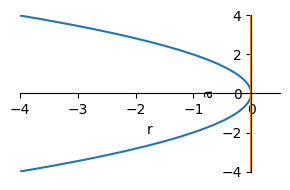

In [33]:
# Parametric plots of solution branches in the (r,a) plane,
# using x as the parameter.
# There is a bifurcation at x = 0, r = 0 for any a.
#   That bifurcation curve is a vertical line in (r,a) space.
#   To form the vertical line, I set r = 0, a = x.
from sympy.plotting import plot_parametric

plot_parametric(
    (-x**2, -2*x),       # branch: r = -x^2, a = -2x
    (0, x),             # branch: vertical line at r=0
    (x, -4, 4),
    xlim=(-4,0.5),
    ylim=(-4,4),
    xlabel='r',
    ylabel='a',
    size=(3, 2)
)
